In [74]:
#Импорт библиотек
from tensorflow.python.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from tensorflow.keras import utils
from tensorflow.python.keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Считываем данные без заголовков, выводим на экран

In [75]:
df = pd.read_csv('seeds_dataset.csv',sep='\s+', header=None)
df

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


Проверяем, что нет незаполненных значений в данных


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       210 non-null    float64
 1   1       210 non-null    float64
 2   2       210 non-null    float64
 3   3       210 non-null    float64
 4   4       210 non-null    float64
 5   5       210 non-null    float64
 6   6       210 non-null    float64
 7   7       210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


добавляем названия наших классов пшеницы

In [77]:
 class_names = ['Kama', 'Rosa', 'Canadian']

In [78]:
#разбиваем класс на фиктивные данные
category = pd.get_dummies(df[7])
#склеиваем
new_df = pd.concat([df, category], axis=1)

In [79]:
dataset = new_df.values #получаем список элементов датасета
x = dataset[:,0:7] #разбиваем на данные
y = dataset[:,8:11]  # и ответы
#print(x)
print(y)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [80]:
#Стандартизация данных
mean = x.mean(axis=0)
std = x.std(axis=0)
x -= mean
x /= std
x

array([[ 1.42097769e-01,  2.15462437e-01,  6.06017918e-05, ...,
         1.41701823e-01, -9.86151745e-01, -3.83577423e-01],
       [ 1.11880257e-02,  8.22375713e-03,  4.28515270e-01, ...,
         1.97432229e-01, -1.78816620e+00, -9.22013487e-01],
       [-1.92066576e-01, -3.60200562e-01,  1.44238325e+00, ...,
         2.08047544e-01, -6.67479334e-01, -1.18919199e+00],
       ...,
       [-5.67570840e-01, -6.90247348e-01,  7.33948301e-01, ...,
        -7.06044846e-02,  3.07658816e+00, -7.18060432e-01],
       [-1.03608992e+00, -1.03564515e+00, -8.01701104e-01, ...,
        -1.12152071e+00, -6.81351965e-02, -7.42534799e-01],
       [-8.77620233e-01, -9.35863561e-01, -1.10234659e-01, ...,
        -7.55292327e-01,  1.29122264e+00, -7.03783718e-01]])

In [81]:
#Нейросеть №1
#Создаем обучающие и тестовые данные (30%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Создаем последовательную модель
model = Sequential()
# Входной полносвязный слой, 128 нейронов
model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(32, activation='linear'))
model.add(Dense(32, activation='relu'))
# Выходной полносвязный слой, 3 нейронов (по количеству классов)
model.add(Dense(3, activation='softmax'))

#вывод информации о модели
print(model.summary())

#Компиляция сети
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 128)               1024      
_________________________________________________________________
dense_29 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_30 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_31 (Dense)             (None, 3)                 99        
Total params: 6,307
Trainable params: 6,307
Non-trainable params: 0
_________________________________________________________________
None


In [82]:
history = model.fit(x_train, y_train, 
                    batch_size=100, 
                    epochs=100,
                    validation_split=0.3,
                    verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 181ms/step - loss: 1.0762 - accuracy: 0.3627 - val_loss: 1.0831 - val_accuracy: 0.4222
Epoch 2/100
2/2 [==============================] - 0s 23ms/step - loss: 1.0573 - accuracy: 0.4510 - val_loss: 1.0659 - val_accuracy: 0.5556
Epoch 3/100
2/2 [==============================] - 0s 36ms/step - loss: 1.0402 - accuracy: 0.5882 - val_loss: 1.0486 - val_accuracy: 0.5778
Epoch 4/100
2/2 [==============================] - 0s 30ms/step - loss: 1.0200 - accuracy: 0.6176 - val_loss: 1.0350 - val_accuracy: 0.5778
Epoch 5/100
2/2 [==============================] - 0s 35ms/step - loss: 1.0064 - accuracy: 0.6275 - val_loss: 1.0244 - val_accuracy: 0.5778
Epoch 6/100
2/2 [==============================] - 0s 31ms/step - loss: 0.9943 - accuracy: 0.6569 - val_loss: 1.0125 - val_accuracy: 0.6222
Epoch 7/100
2/2 [==============================] - 0s 30ms/step - loss: 0.9827 - accuracy: 0.6569 - val_loss: 0.9975 - val_accuracy: 0.6222
Epoch 8/100
2/2 [==

In [83]:
#реальная оценка качества обучения
scores = model.evaluate(x_test, y_test, verbose=1)
print("Доля правильных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

2/2 [==============================] - 0s 6ms/step - loss: 0.3185 - accuracy: 0.9365
Доля правильных ответов на тестовых данных, в процентах: 93.6508


In [112]:
scores = model.evaluate(x_train, y_train, verbose=1)
print("Доля правильных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

5/5 [==============================] - 0s 3ms/step - loss: 0.1559 - accuracy: 0.9456
Доля правильных ответов на тестовых данных, в процентах: 94.5578


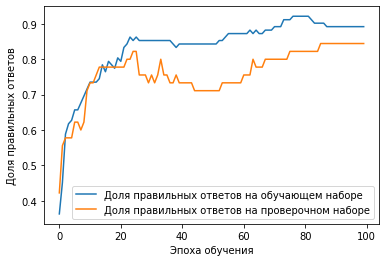

In [85]:
plt.plot(history.history['accuracy'], 
         label='Доля правильных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля правильных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля правильных ответов')
plt.legend()
plt.show()

In [86]:
pred = model.predict(x_test)

In [87]:
n=13
prediction = np.argmax(pred[n])
print("Название класса:", class_names[prediction])
print("Правильный класс:", class_names[np.argmax(y_test[n])])

Название класса: Canadian
Правильный класс: Canadian


In [88]:
#Нейросеть №2
#Создаем обучающие и тестовые данные (10%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

# Создаем последовательную модель
model = Sequential()
# Входной полносвязный слой, 512 нейронов
model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(400, activation='linear'))
# Выходной полносвязный слой, 3 нейронов (по количеству классов)
model.add(Dense(3, activation='softmax'))

#вывод информации о модели
print(model.summary())

#Компиляция сети
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 512)               4096      
_________________________________________________________________
dense_33 (Dense)             (None, 400)               205200    
_________________________________________________________________
dense_34 (Dense)             (None, 3)                 1203      
Total params: 210,499
Trainable params: 210,499
Non-trainable params: 0
_________________________________________________________________
None


In [89]:
history = model.fit(x_train, y_train, 
                    batch_size=128, 
                    epochs=15,
                    validation_split=0.1,
                    verbose=1)

Epoch 1/15
2/2 [==============================] - 1s 178ms/step - loss: 0.6799 - accuracy: 0.2824 - val_loss: 0.4768 - val_accuracy: 0.8421
Epoch 2/15
2/2 [==============================] - 0s 27ms/step - loss: 0.4253 - accuracy: 0.8412 - val_loss: 0.3501 - val_accuracy: 0.8421
Epoch 3/15
2/2 [==============================] - 0s 32ms/step - loss: 0.3074 - accuracy: 0.8647 - val_loss: 0.2755 - val_accuracy: 0.8947
Epoch 4/15
2/2 [==============================] - 0s 30ms/step - loss: 0.2489 - accuracy: 0.8824 - val_loss: 0.2273 - val_accuracy: 0.8947
Epoch 5/15
2/2 [==============================] - 0s 33ms/step - loss: 0.2134 - accuracy: 0.8882 - val_loss: 0.1950 - val_accuracy: 0.8947
Epoch 6/15
2/2 [==============================] - 0s 27ms/step - loss: 0.1893 - accuracy: 0.8824 - val_loss: 0.1772 - val_accuracy: 0.8947
Epoch 7/15
2/2 [==============================] - 0s 39ms/step - loss: 0.1689 - accuracy: 0.9000 - val_loss: 0.1698 - val_accuracy: 0.8947
Epoch 8/15
2/2 [==========

In [90]:
#реальная оценка качества обучения
scores = model.evaluate(x_test, y_test, verbose=1)
print("Доля правильных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

1/1 [==============================] - 0s 20ms/step - loss: 0.1458 - accuracy: 0.9524
Доля правильных ответов на тестовых данных, в процентах: 95.2381


In [91]:
scores = model.evaluate(x_train, y_train, verbose=1)
print("Доля правильных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

6/6 [==============================] - 0s 3ms/step - loss: 0.1183 - accuracy: 0.9206
Доля правильных ответов на тестовых данных, в процентах: 92.0635


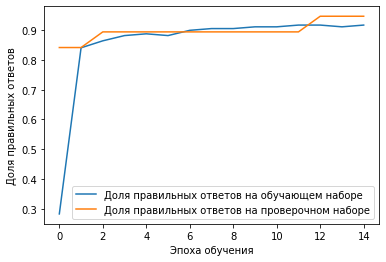

In [92]:
plt.plot(history.history['accuracy'], 
         label='Доля правильных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля правильных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля правильных ответов')
plt.legend()
plt.show()

In [93]:
pred = model.predict(x_test)
n=1
prediction = np.argmax(pred[n])
print("Название класса:", class_names[prediction])
print("Правильный класс:", class_names[np.argmax(y_test[n])])

Название класса: Canadian
Правильный класс: Canadian


In [94]:
#Нейросеть №3
#Создаем обучающие и тестовые данные (10%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

# Создаем последовательную модель
model = Sequential()
# Входной полносвязный слой
model.add(Dense(800, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(400, activation='linear'))
model.add(Dense(200, activation='tanh'))
# Выходной полносвязный слой, 3 нейрона (по количеству классов)
model.add(Dense(3, activation='softmax'))

#вывод информации о модели
print(model.summary())

#Компиляция сети
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 800)               6400      
_________________________________________________________________
dense_36 (Dense)             (None, 400)               320400    
_________________________________________________________________
dense_37 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_38 (Dense)             (None, 3)                 603       
Total params: 407,603
Trainable params: 407,603
Non-trainable params: 0
_________________________________________________________________
None


In [95]:
history = model.fit(x_train, y_train, 
                    batch_size=10, 
                    epochs=15,
                    validation_split=0.3,
                    verbose=1)

Epoch 1/15
14/14 [==============================] - 1s 20ms/step - loss: 0.8118 - accuracy: 0.8106 - val_loss: 0.6394 - val_accuracy: 0.8596
Epoch 2/15
14/14 [==============================] - 0s 9ms/step - loss: 0.5662 - accuracy: 0.8485 - val_loss: 0.4825 - val_accuracy: 0.8947
Epoch 3/15
14/14 [==============================] - 0s 7ms/step - loss: 0.4597 - accuracy: 0.8864 - val_loss: 0.3997 - val_accuracy: 0.8947
Epoch 4/15
14/14 [==============================] - 0s 6ms/step - loss: 0.3956 - accuracy: 0.9015 - val_loss: 0.3455 - val_accuracy: 0.9123
Epoch 5/15
14/14 [==============================] - 0s 6ms/step - loss: 0.3531 - accuracy: 0.9167 - val_loss: 0.3108 - val_accuracy: 0.9123
Epoch 6/15
14/14 [==============================] - 0s 8ms/step - loss: 0.3258 - accuracy: 0.8939 - val_loss: 0.2946 - val_accuracy: 0.8947
Epoch 7/15
14/14 [==============================] - 0s 7ms/step - loss: 0.3064 - accuracy: 0.8939 - val_loss: 0.2661 - val_accuracy: 0.9123
Epoch 8/15
14/14 [=

In [96]:
#реальная оценка качества обучения
scores = model.evaluate(x_test, y_test, verbose=1)
print("Доля правильных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

1/1 [==============================] - 0s 22ms/step - loss: 0.1166 - accuracy: 1.0000
Доля правильных ответов на тестовых данных, в процентах: 100.0


In [97]:
scores = model.evaluate(x_train, y_train, verbose=1)
print("Доля правильных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

6/6 [==============================] - 0s 3ms/step - loss: 0.2131 - accuracy: 0.9153
Доля правильных ответов на тестовых данных, в процентах: 91.5344


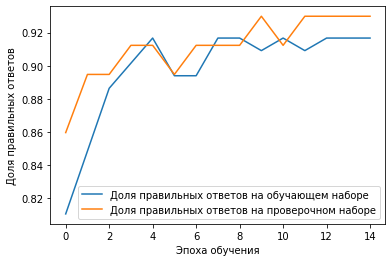

In [98]:
plt.plot(history.history['accuracy'], 
         label='Доля правильных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля правильных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля правильных ответов')
plt.legend()
plt.show()

In [99]:
pred = model.predict(x_test)
n=2
prediction = np.argmax(pred[n])
print("Название класса:", class_names[prediction])
print("Правильный класс:", class_names[np.argmax(y_test[n])])

Название класса: Rosa
Правильный класс: Rosa


In [100]:
#Нейросеть №4
#Создаем обучающие и тестовые данные (40%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

# Создаем последовательную модель
model = Sequential()
# Входной полносвязный слой
model.add(Dense(100, activation='linear', input_shape=(x_train.shape[1],)))
model.add(Dense(80, activation='tanh'))
# Выходной полносвязный слой, 3 нейрона (по количеству классов)
model.add(Dense(3, activation='softmax'))

#вывод информации о модели
print(model.summary())

#Компиляция сети
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 100)               800       
_________________________________________________________________
dense_40 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_41 (Dense)             (None, 3)                 243       
Total params: 9,123
Trainable params: 9,123
Non-trainable params: 0
_________________________________________________________________
None


In [101]:
history = model.fit(x_train, y_train, 
                    batch_size=2, 
                    epochs=95,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/95
50/50 [==============================] - 1s 6ms/step - loss: 0.3571 - accuracy: 0.8900 - val_loss: 0.1977 - val_accuracy: 0.9231
Epoch 2/95
50/50 [==============================] - 0s 3ms/step - loss: 0.2099 - accuracy: 0.9000 - val_loss: 0.1696 - val_accuracy: 0.9231
Epoch 3/95
50/50 [==============================] - 0s 3ms/step - loss: 0.1953 - accuracy: 0.9000 - val_loss: 0.1340 - val_accuracy: 0.9615
Epoch 4/95
50/50 [==============================] - 0s 3ms/step - loss: 0.1462 - accuracy: 0.9300 - val_loss: 0.1134 - val_accuracy: 1.0000
Epoch 5/95
50/50 [==============================] - 0s 2ms/step - loss: 0.1339 - accuracy: 0.9600 - val_loss: 0.1088 - val_accuracy: 0.9615
Epoch 6/95
50/50 [==============================] - 0s 2ms/step - loss: 0.1154 - accuracy: 0.9500 - val_loss: 0.1418 - val_accuracy: 0.9615
Epoch 7/95
50/50 [==============================] - 0s 2ms/step - loss: 0.1123 - accuracy: 0.9400 - val_loss: 0.0964 - val_accuracy: 0.9615
Epoch 8/95
50/50 [==

In [102]:
#реальная оценка качества обучения
scores = model.evaluate(x_test, y_test, verbose=1)
print("Доля правильных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

3/3 [==============================] - 0s 4ms/step - loss: 0.1201 - accuracy: 0.9643
Доля правильных ответов на тестовых данных, в процентах: 96.4286


In [103]:
scores = model.evaluate(x_train, y_train, verbose=1)
print("Доля правильных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

4/4 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 1.0000
Доля правильных ответов на тестовых данных, в процентах: 100.0


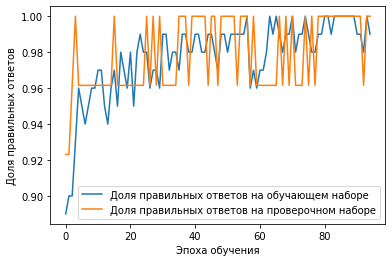

In [104]:
plt.plot(history.history['accuracy'], 
         label='Доля правильных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля правильных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля правильных ответов')
plt.legend()
plt.show()

In [105]:
pred = model.predict(x_test)
n=2
prediction = np.argmax(pred[n])
print("Название класса:", class_names[prediction])
print("Правильный класс:", class_names[np.argmax(y_test[n])])

Название класса: Kama
Правильный класс: Kama


In [106]:
#Нейросеть №5
#Создаем обучающие и тестовые данные (30%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Создаем последовательную модель
model = Sequential()
# Входной полносвязный слой, 256 нейронов
model.add(Dense(256, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
# Выходной полносвязный слой, 3 нейронов (по количеству классов)
model.add(Dense(3, activation='softmax'))

#вывод информации о модели
print(model.summary())

#Компиляция сети
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 256)               2048      
_________________________________________________________________
dense_43 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_44 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_45 (Dense)             (None, 3)                 195       
Total params: 43,395
Trainable params: 43,395
Non-trainable params: 0
_________________________________________________________________
None


In [107]:
history = model.fit(x_train, y_train, 
                    batch_size=50, 
                    epochs=10,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/10
3/3 [==============================] - 1s 109ms/step - loss: 1.0464 - accuracy: 0.3675 - val_loss: 0.7812 - val_accuracy: 0.7333
Epoch 2/10
3/3 [==============================] - 0s 14ms/step - loss: 0.8087 - accuracy: 0.7436 - val_loss: 0.6108 - val_accuracy: 0.8333
Epoch 3/10
3/3 [==============================] - 0s 13ms/step - loss: 0.6541 - accuracy: 0.8462 - val_loss: 0.4826 - val_accuracy: 0.9000
Epoch 4/10
3/3 [==============================] - 0s 17ms/step - loss: 0.5243 - accuracy: 0.8632 - val_loss: 0.3903 - val_accuracy: 0.8667
Epoch 5/10
3/3 [==============================] - 0s 15ms/step - loss: 0.4229 - accuracy: 0.9316 - val_loss: 0.3285 - val_accuracy: 0.9000
Epoch 6/10
3/3 [==============================] - 0s 17ms/step - loss: 0.3364 - accuracy: 0.9402 - val_loss: 0.2847 - val_accuracy: 0.9000
Epoch 7/10
3/3 [==============================] - 0s 16ms/step - loss: 0.2689 - accuracy: 0.9402 - val_loss: 0.2568 - val_accuracy: 0.9000
Epoch 8/10
3/3 [==========

In [111]:
#реальная оценка качества обучения
scores = model.evaluate(x_test, y_test, verbose=1)
print("Доля правильных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

2/2 [==============================] - 0s 7ms/step - loss: 0.3386 - accuracy: 0.8889
Доля правильных ответов на тестовых данных, в процентах: 88.8889


In [109]:
scores = model.evaluate(x_train, y_train, verbose=1)
print("Доля правильных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

5/5 [==============================] - 0s 3ms/step - loss: 0.1559 - accuracy: 0.9456
Доля правильных ответов на тестовых данных, в процентах: 94.5578


In [110]:
model.save("model")

INFO:tensorflow:Assets written to: model/assets
